In [ ]:
import pandas as pd
import igraph
import numpy as np

node_table = pd.read_csv(
    "https://raw.githubusercontent.com/skojaku/adv-net-sci-course/main/data/airport_network_v2/node_table.csv"
)
edge_table = pd.read_csv(
    "https://raw.githubusercontent.com/skojaku/adv-net-sci-course/main/data/airport_network_v2/edge_table.csv"
)
src, trg = tuple(edge_table[["src", "trg"]].values.T)
edge_list = tuple(zip(src, trg))

# node_id and name dictionary
n_nodes = node_table.shape[0]
id2name = np.array([""] * n_nodes, dtype="<U64")
id2name[node_table["node_id"]] = node_table["Name"].values

g = igraph.Graph(
    edge_list,
    vertex_attrs=dict(Name=id2name, node_id=node_table["node_id"].values),
)

# You can retrieve the airport names by
print(g.vs[0]["Name"], ",", g.vs[1]["Name"], ", ...")


In [ ]:
import numpy as np
import sys
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sys.path.append("../scripts")
from network_robustness import *

plot_data = []

x, y = random_attack(g)
plot_data.append(pd.DataFrame({"x": x, "y": y, "attackType": "random"}))

x, y = degree_targeted_attack(g)
plot_data.append(pd.DataFrame({"x": x, "y": y, "attackType": "targeted (degree)"}))

# Betweeenness-based attack may take time. You might want to comment this out if you do not test it.
x, y = betweenness_targeted_attack(g)
plot_data.append(pd.DataFrame({"x": x, "y": y, "attackType": "targeted (betweenness)"}))

plot_data = pd.concat(plot_data)


You will see a plot like this. 

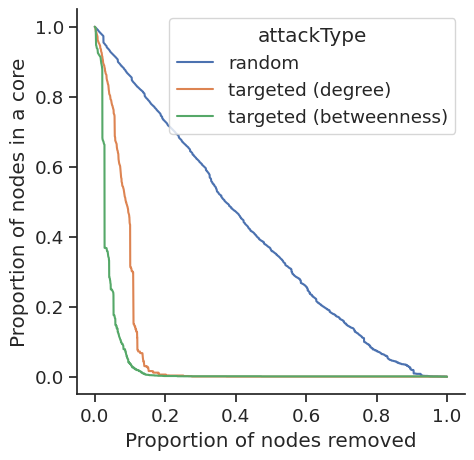

In [5]:
# Plot
sns.set_style("white")
sns.set(font_scale=1.2)
sns.set_style("ticks")

fig, ax = plt.subplots(figsize=(5, 5))
ax = sns.lineplot(data=plot_data, x="x", y="y", hue="attackType")
ax.set_xlabel("Proportion of nodes removed")
ax.set_ylabel("Proportion of nodes in a core")
sns.despine()


In [6]:
# Some simple check
# Make sure that your x and y start at either zero or one and end at either 0 or 1.
